In [1]:
import matplotlib.pyplot as plt
import numpy as np

from snn_dpe.tools.data import normalize_iris_data, read_iris_data
from snn_dpe.tools.network import (create_encoders, create_network,
                                   find_steady_state, reset_network,
                                   run_network, run_network_early_exit)
from snn_dpe.tools.plotting import (plot_fire_matrix, plot_spikes,
                                    plot_steady_state)

iris_data_location = '../Data/Iris/iris.data'

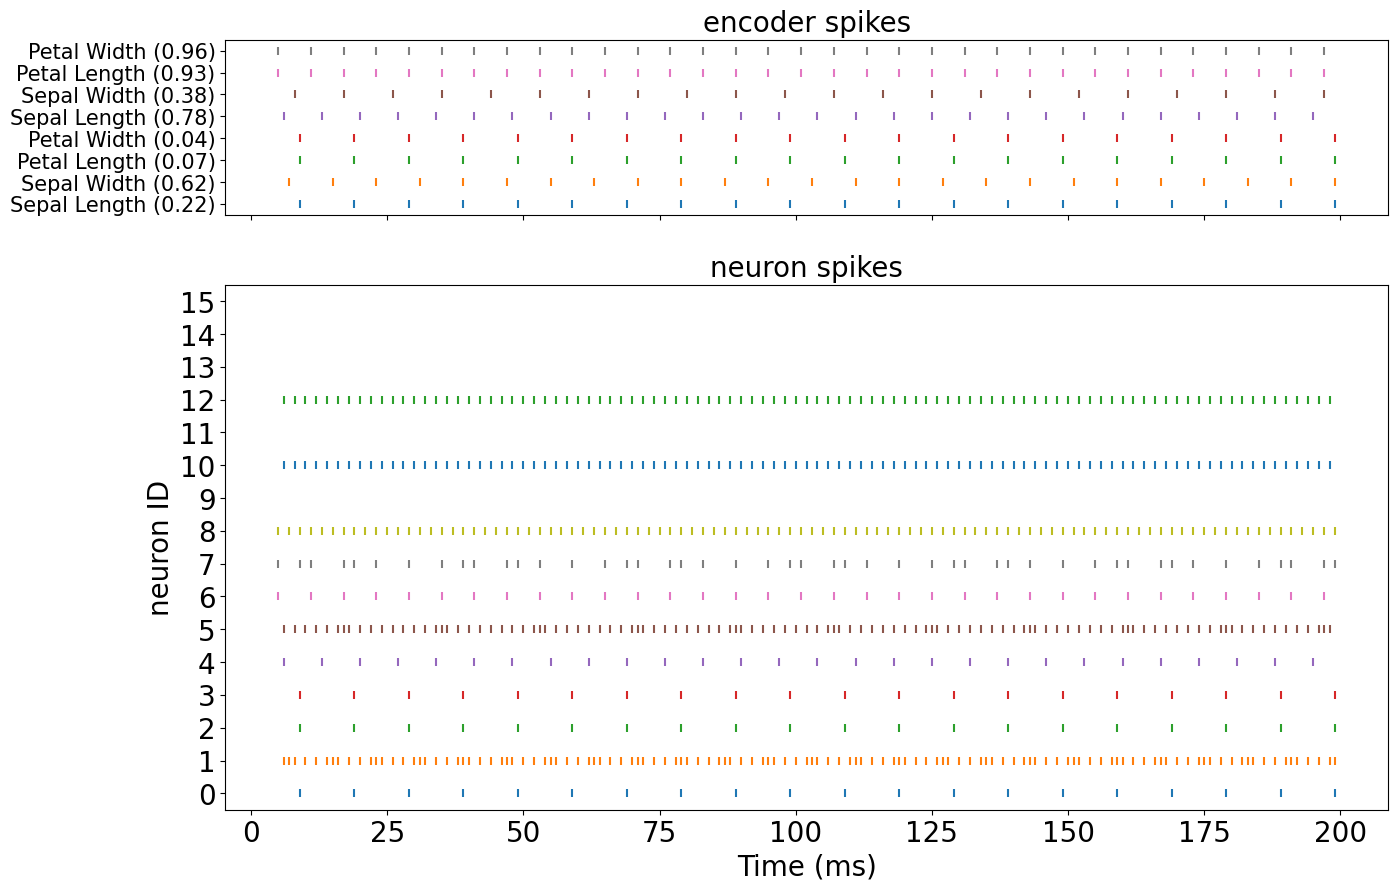

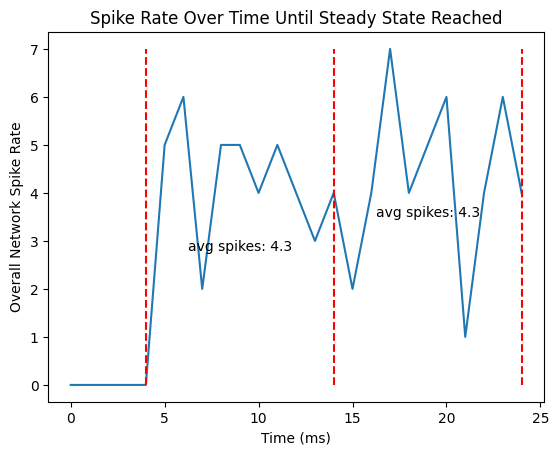

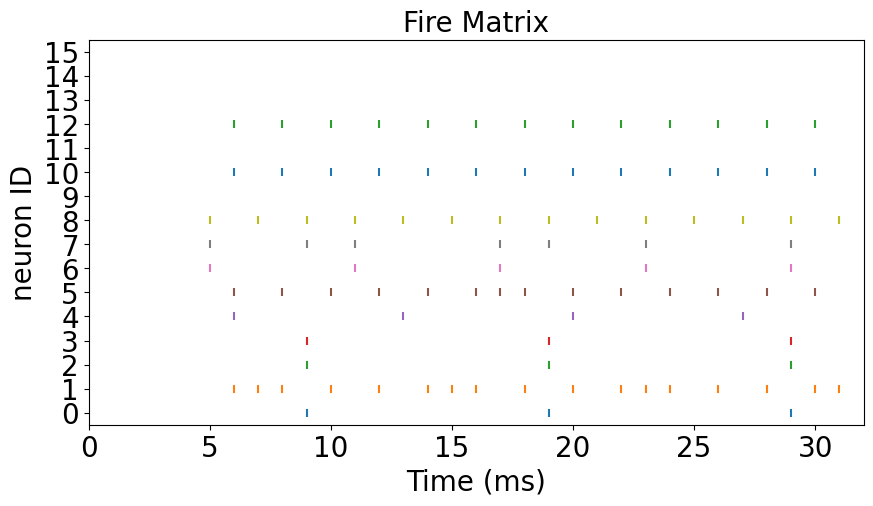

avg neuron fire rates (x):
neuron 15: 0.0
neuron 14: 0.0
neuron 13: 0.0
neuron 12: 0.40625
neuron 11: 0.0
neuron 10: 0.40625
neuron 9: 0.0
neuron 8: 0.4375
neuron 7: 0.21875
neuron 6: 0.15625
neuron 5: 0.4375
neuron 4: 0.125
neuron 3: 0.09375
neuron 2: 0.09375
neuron 1: 0.53125
neuron 0: 0.09375


In [2]:
iris_data, labels, classes, attributes = read_iris_data(iris_data_location)

normalized_iris_data = normalize_iris_data(iris_data, attributes)


# normalized_iris_data = np.append(normalized_iris_data[0:2], (1-normalized_iris_data[0:2]), axis=1)

# create a test network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

# neurons = create_network(n_neurons, n_synapses)
neurons = create_network(n_neurons, n_synapses, negative_weights=True, threshold_range=(0.1, 0.4), leak_range=(0.01, 0.15), weight_factor=1.8)

min_f = 100
max_f = 180
sim_f = 1000

encoders = create_encoders(2*len(attributes), min_f, max_f, sim_f, enc_type='period')
# encoders = create_encoders(2*len(attributes), min_f, max_f, sim_f, enc_type='frequency')


# encoders = create_encoders(2*len(attributes), enc_type='frequency')

sim_time = 200
# feed a test sample into the test network and run it

enc_inputs = np.append(normalized_iris_data[0], (1-normalized_iris_data[0]))

fires = run_network(neurons, encoders, enc_inputs, sim_time)

reset_network(neurons, encoders)

plot_spikes(fires, attributes + attributes, enc_inputs, sim_time)

window_size = 10
fire_matrix, total_fires, steady_state_t, (m1, m2) = find_steady_state(sim_time, attributes, fires, window_size=window_size)

if steady_state_t == 0:
    steady_state_t = sim_time

plot_steady_state(steady_state_t, total_fires, window_size, m1, m2)

# test early exit
fire_matrix = run_network_early_exit(neurons, encoders, enc_inputs, sim_time, window_size=window_size)

reset_network(neurons, encoders)

plot_fire_matrix(fire_matrix)